<a href="https://colab.research.google.com/github/missyben10/Weather-Data-Normalization/blob/main/weather_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from google.colab import files

# Upload a file from your local device
uploaded = files.upload()

Saving weather_data.csv to weather_data.csv


In [ ]:
# Load dataset (make sure weather_data.csv is uploaded or in repo)
df = pd.read_csv("weather_data.csv")

# Check if 'Temperature' column exists
if 'Temperature' not in df.columns:
    raise ValueError("The dataset must contain a 'Temperature' column.")

print("Original Dataset:\n", df.head())

Original Dataset:
          Date  Temperature
0  2024-01-01    11.650114
1  2024-01-02    12.346840
2  2024-01-03    21.891185
3  2024-01-04    28.187253
4  2024-01-05    25.724236


In [ ]:
# --- Apply Min-Max Normalization ---
minmax_scaler = MinMaxScaler()
df['MinMax_Temperature'] = minmax_scaler.fit_transform(df[['Temperature']])

# --- Apply Z-score Standardization ---
zscore_scaler = StandardScaler()
df['Zscore_Temperature'] = zscore_scaler.fit_transform(df[['Temperature']])

print("\nProcessed Dataset:\n", df.head())


Processed Dataset:
          Date  Temperature  MinMax_Temperature  Zscore_Temperature
0  2024-01-01    11.650114            0.002443           -1.201463
1  2024-01-02    12.346840            0.032806           -1.108988
2  2024-01-03    21.891185            0.448740            0.157813
3  2024-01-04    28.187253            0.723117            0.993477
4  2024-01-05    25.724236            0.615781            0.666566


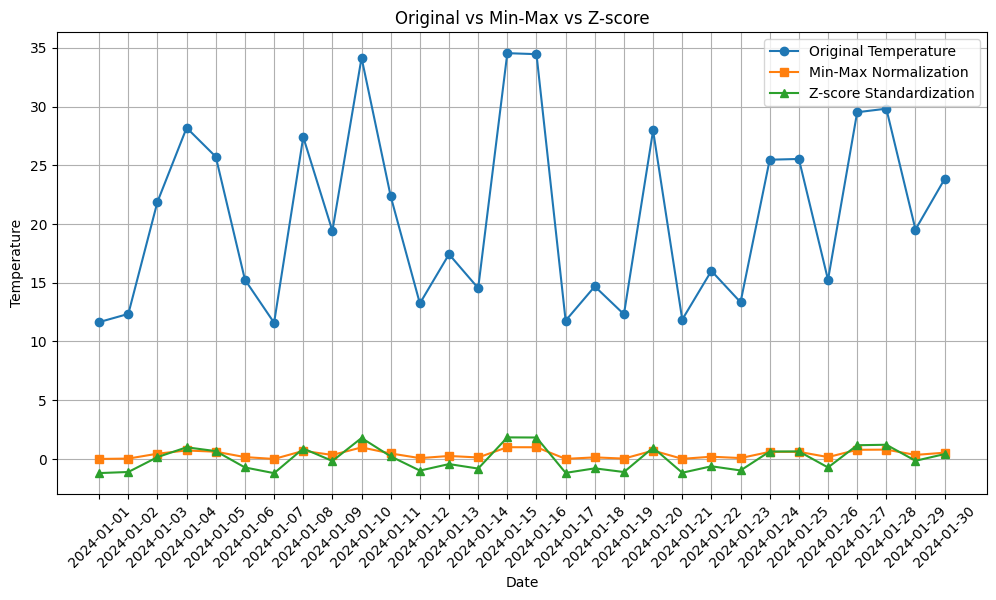

In [ ]:
plt.figure(figsize=(12,6))

# Original
plt.plot(df['Date'], df['Temperature'], label='Original Temperature', marker='o')

# Min-Max
plt.plot(df['Date'], df['MinMax_Temperature'], label='Min-Max Normalization', marker='s')

# Z-score
plt.plot(df['Date'], df['Zscore_Temperature'], label='Z-score Standardization', marker='^')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Original vs Min-Max vs Z-score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Save & Show
plt.savefig("plot.png")
plt.show()

In [ ]:
# Save processed dataset
df.to_csv("processed_weather_data.csv", index=False)
print("\nProcessed data saved as 'processed_weather_data.csv'.")


Processed data saved as 'processed_weather_data.csv'.
